In [1]:
import clean, residual, run
import numpy as np
import matplotlib.pylab as plt
import re
from tables import open_file
from statistics import median, mode
from scipy.optimize import curve_fit, minimize
from math import acos, degrees, log
from matplotlib.colors import LogNorm

In [2]:
a = clean.clean('20181205_092552_UTC_SDOM5_FLASH_SANTACLAUS_P2_violet_both_5000Hz_16V_60s_18339132719.hld_up.hdf5')

percentage of high jumps in the file - 1.815690909649096


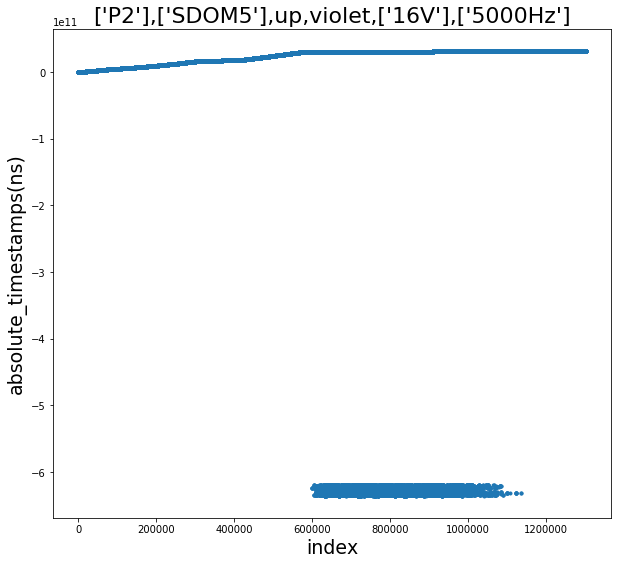

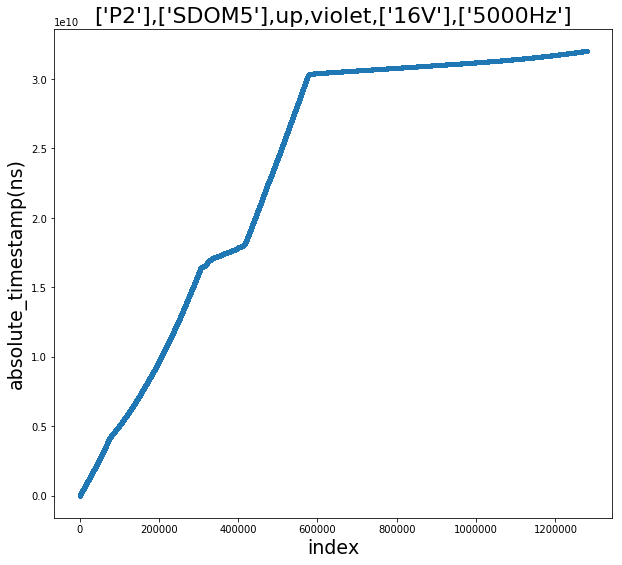

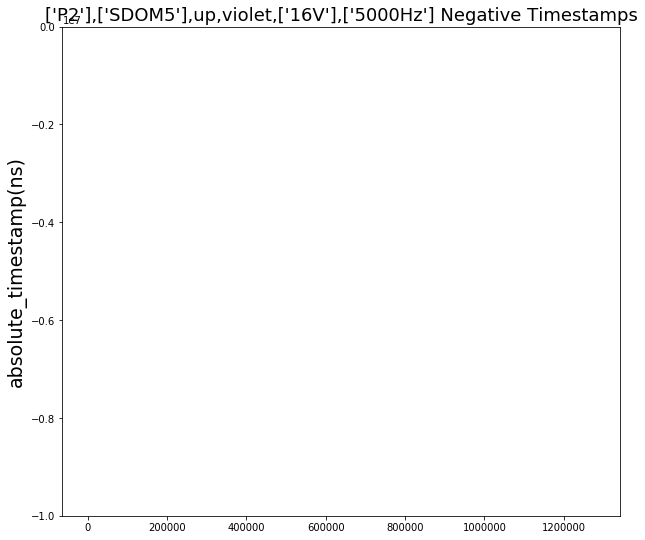

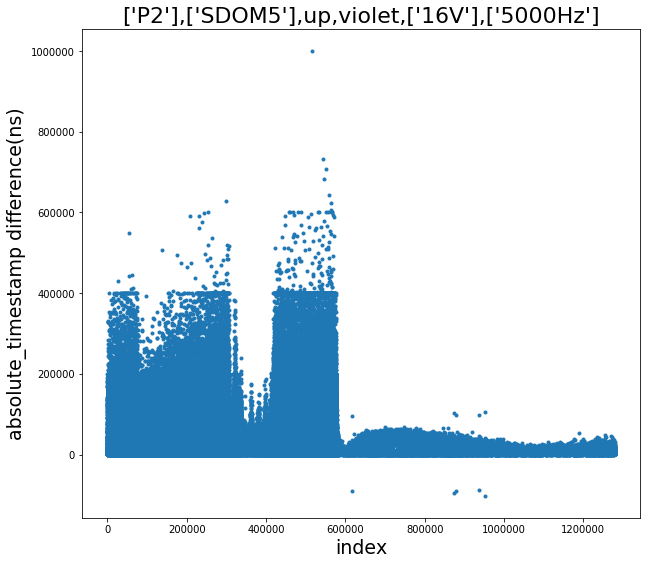

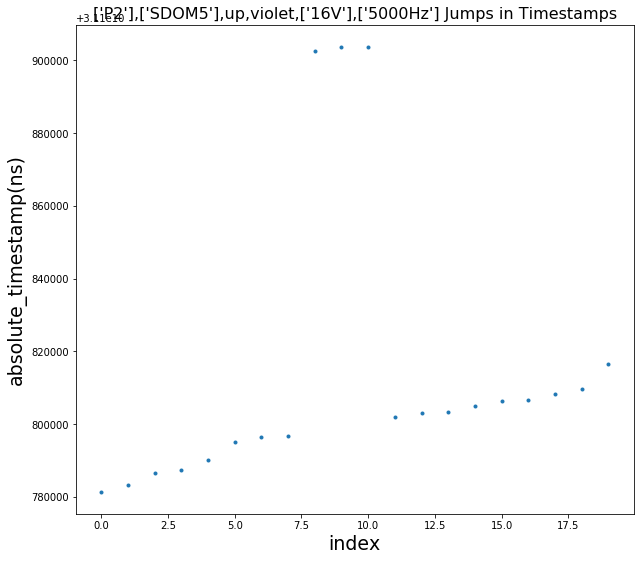

[615635. 615636. 873327. 877949. 877950. 877951. 877952. 877953. 937808.
 937809. 937810. 937811. 937812. 952941. 952942. 952943.]


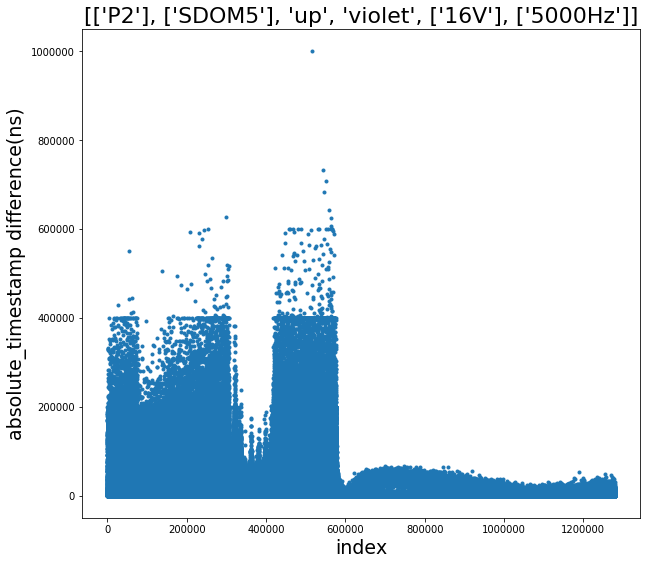

1.3183093326321358


In [3]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT) = a.P_S_used()

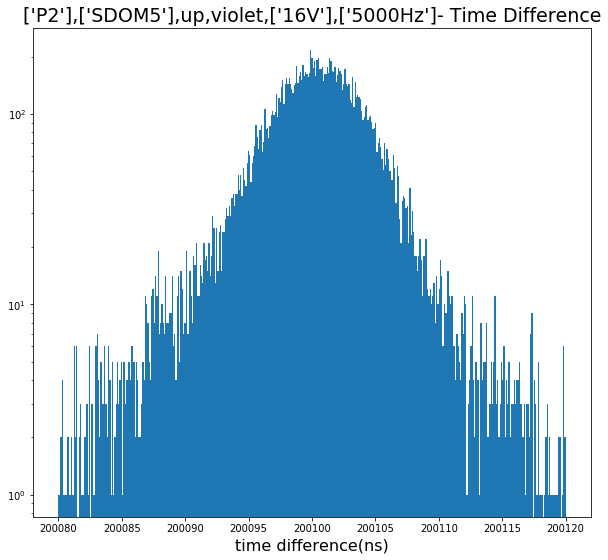

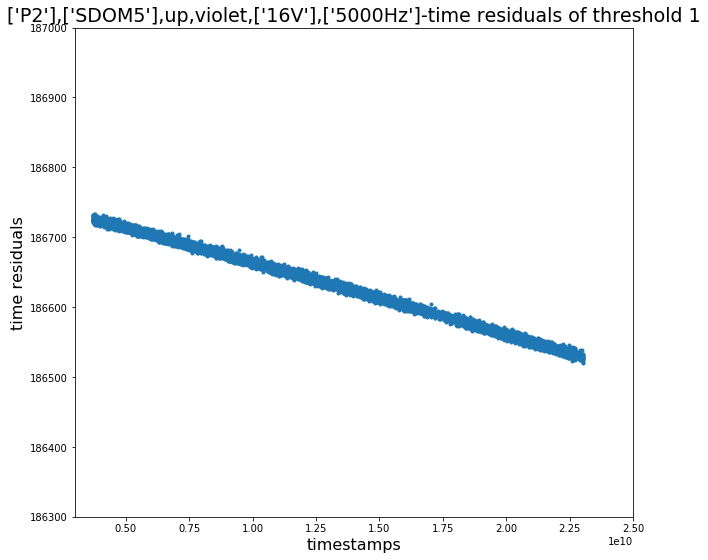

In [4]:
r1 = residual.residual(abs_elim_3,rising_1_elim_3,200080, 200120, 400, 
                                200095, 200105,
             0.3e10,2.5e10,186300, 187000, file_path, values, POCAM_num)

In [5]:
gaus_peak = r1.minimizer(0.75e10, 2.0e10)

200100.32795663626


[ 95 152 953]


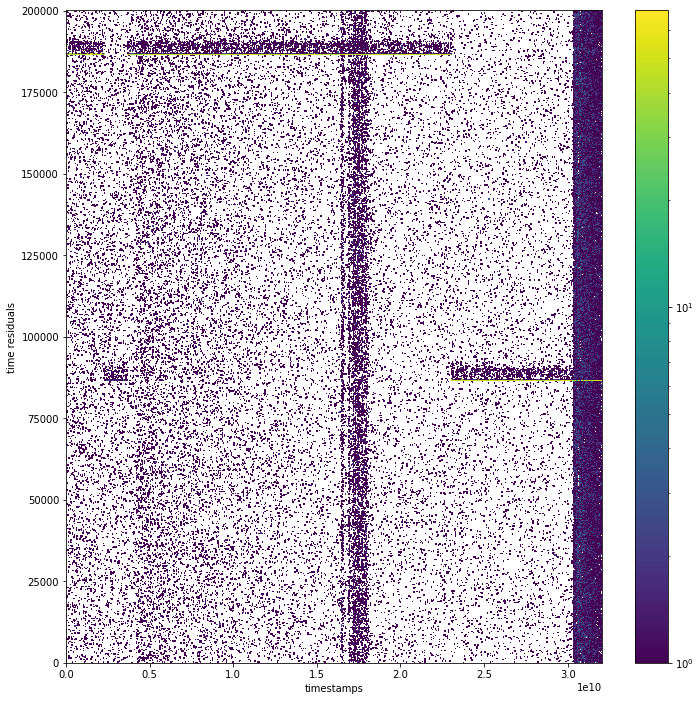

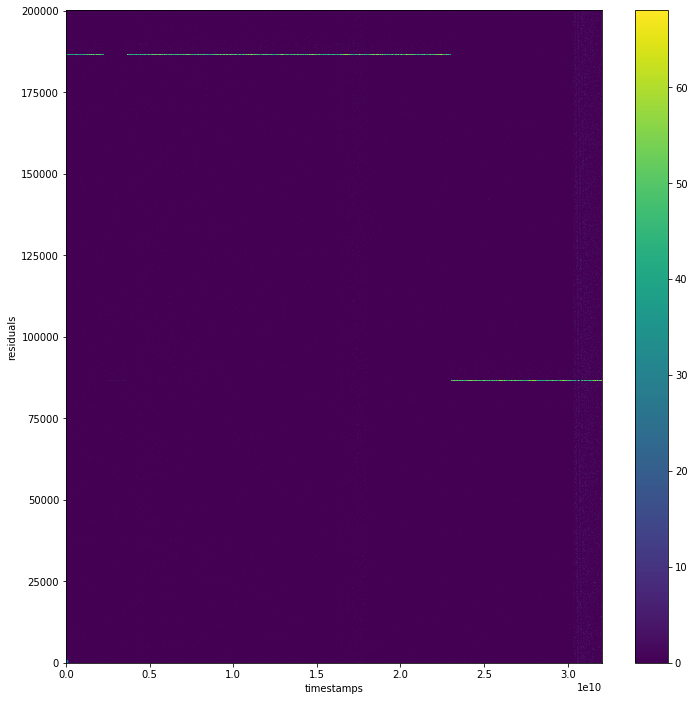

In [6]:
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r1.HIST2D(1325, gaus_peak, SDOM_num)

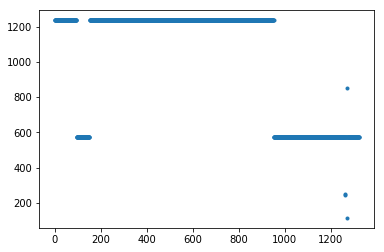

In [7]:
plt.plot(POCAM_bins, '.')

run# 0
b 95 Max 95
select size 7620
median -  186663.47601853052
a 95 95 min
run# 1
b 152 Max 152
select size 4296
median -  86664.20602399466
a 152 152 min
run# 2
b 953 Max 953
select size 66758
median -  186766.03772675595
a 953 953 min
run# 3
b 1325 Max 1325
yaxis -  571
median -  86761.1682883132
a 1325 1325 min


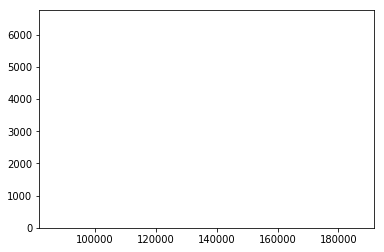

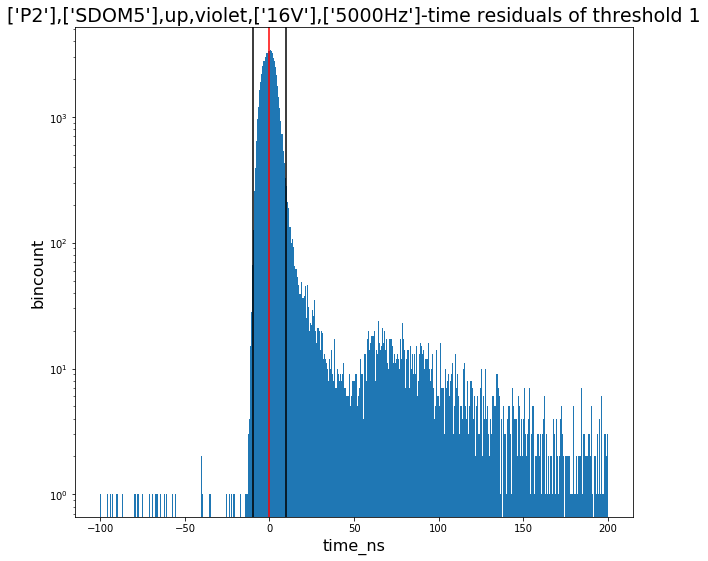

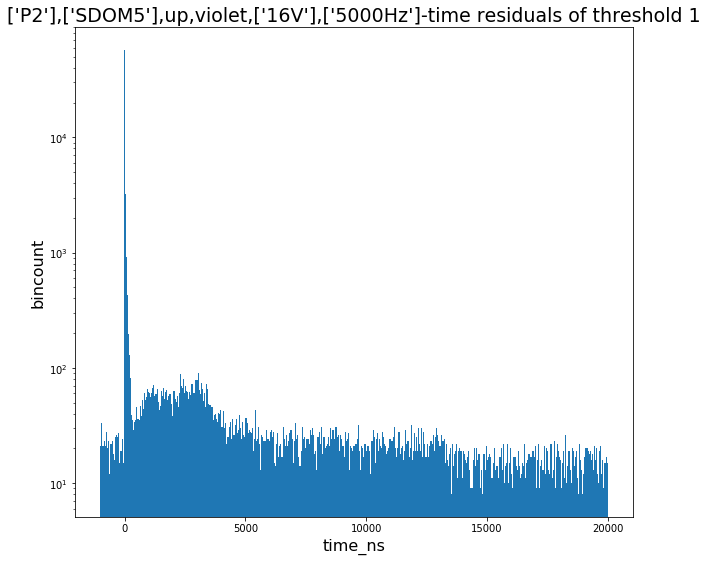

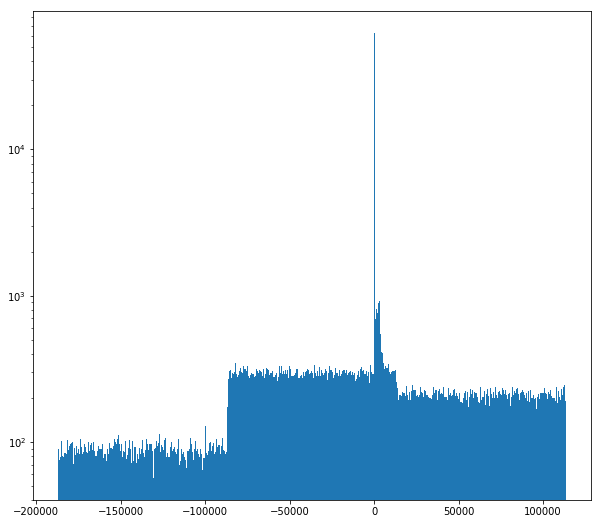

In [8]:
t_res_all1,  num_events1, noise_events1 = r1.calc_res(BinsHist,10, 5, 5)

In [9]:
v1 = run.run()

In [10]:
RunTime1, error_rtime1 = v1.run_time(atstamp, p_jumps, dt_mean)

600541

600651 600546
604951 600653
605436 604953
605665 605441
606078 605669
606319 606081
607218 606324
607927 607227
608398 607931
609058 608403
609619 609062
609814 609621
609869 609817
610196 609874
610347 610204
610458 610351
610605 610465
610659 610608
610763 610665
610865 610766
611018 610869
611128 611020
611233 611134
611289 611237
611344 611291
611497 611350
611915 611505
612322 611918
612377 612328
612890 612380
612989 612895
613095 612991
613387 613097
613600 613391
613695 613605
614373 613700
614429 614382
614638 614431
614791 614642
614845 614793
615139 614848
615666 615142
615721 615668
616129 615727
617281 616132
617439 617284
617584 617443
617693 617586
617750 617704
617962 617753
618259 617964
618314 618263
618470 618320
618524 618473
618634 618526
618689 618636
618848 618695
618998 618852
619163 619001
619219 619170
619274 619222
619329 619277
619385 619335
619440 619389
619603 619442
619763 619606
619871 619769
620030 619877
620196 620035
620250 620203
620305 62026

698151 698098
698209 698158
698264 698212
698319 698267
698377 698323
698435 698385
698491 698437
698548 698495
698604 698550
698660 698608
698774 698674
698829 698779
698887 698834
698943 698889
698999 698954
699056 699007
699114 699058
699171 699116
699229 699180
699286 699232
699344 699296
699456 699348
699567 699462
699623 699579
699680 699630
699737 699687
699792 699740
699848 699795
699961 699852
700018 699970
700129 700025
700186 700135
700240 700189
700297 700249
700409 700300
700465 700417
700520 700471
700688 700526
700745 700691
700801 700749
700858 700807
700914 700861
700970 700920
701084 700979
701308 701097
701365 701312
701423 701375
701480 701429
701537 701490
701592 701544
701648 701597
701705 701651
701817 701714
701874 701828
701930 701890
701988 701936
702044 701992
702100 702049
702155 702104
702210 702158
702265 702216
702322 702280
702378 702330
702434 702383
702489 702437
702545 702501
702602 702548
702659 702605
702714 702663
702771 702723
702883 702780
702940

765329 765279
765385 765339
765440 765391
765495 765443
765550 765501
765606 765559
765662 765618
765718 765664
765775 765721
765831 765778
765886 765833
765998 765893
766055 766011
766112 766066
766166 766116
766223 766171
766279 766231
766334 766286
766389 766341
766501 766401
766559 766511
766615 766568
766672 766623
766728 766675
766784 766734
766839 766787
766895 766842
767008 766897
767065 767015
767121 767075
767179 767128
767236 767183
767351 767243
767408 767354
767465 767424
767520 767469
767577 767525
767634 767585
767688 767638
767801 767705
767857 767811
767914 767869
767972 767926
768084 767974
768142 768092
768310 768145
768367 768314
768425 768372
768536 768429
768594 768543
768650 768607
768763 768659
768818 768768
768874 768822
768930 768880
768988 768940
769045 768994
769101 769062
769157 769110
769214 769161
769270 769218
769327 769279
769383 769337
769440 769392
769496 769444
769609 769501
769665 769612
769719 769671
769775 769723
769833 769778
769887 769839
770057

840820 840712
840877 840823
840987 840879
841101 840994
841214 841114
841273 841218
841330 841281
841385 841334
841440 841387
841498 841445
841555 841508
841612 841559
841723 841617
841778 841727
841889 841782
842003 841891
842061 842016
842173 842063
842231 842182
842287 842236
842343 842291
842398 842350
842454 842401
842510 842459
842564 842513
842621 842568
842677 842631
842734 842679
842791 842737
842846 842793
842903 842848
842959 842907
843016 842964
843072 843018
843129 843075
843184 843133
843353 843188
843464 843355
843520 843470
843577 843522
843634 843584
843690 843645
843746 843697
843802 843749
843858 843806
843916 843869
844023 843925
844135 844029
844191 844137
844248 844196
844304 844252
844359 844306
844416 844363
844472 844421
844526 844474
844581 844534
844637 844590
844694 844646
844750 844709
844862 844753
844919 844871
845028 844926
845084 845034
845141 845091
845196 845149
845307 845201
845363 845317
845420 845366
845477 845425
845532 845482
845644 845541
845754

923081 922923
923137 923087
923193 923141
923250 923201
923304 923257
923359 923312
923468 923363
923523 923474
923580 923527
923689 923583
923744 923695
923801 923749
924080 923807
924192 924086
924248 924194
924302 924250
924359 924306
924415 924362
924526 924419
924692 924536
924803 924698
924859 924808
924915 924861
925025 924920
925135 925031
925189 925138
925243 925191
925343 925247
925398 925348
925509 925403
925565 925513
925675 925575
925731 925680
925887 925733
925943 925892
925998 925946
926052 926005
926329 926055
926384 926332
926497 926391
926608 926499
926663 926615
926879 926667
926934 926884
926991 926938
927047 926995
927101 927051
927206 927105
927317 927209
927375 927326
927537 927379
927701 927539
927758 927708
927920 927764
928025 927926
928187 928027
928242 928192
928297 928245
928353 928300
928409 928356
928464 928411
928520 928471
928575 928526
928687 928578
928744 928693
928855 928749
928912 928864
928967 928917
929023 928970
929080 929026
929174 929083
929230

1074521 1074283
1074742 1074523
1075933 1074747
1081608 1075936
1083895 1081610
1084778 1083902
1085043 1084783
1086620 1085045
1090410 1086623
1100836 1090414
1108610 1100843
1125040 1108612
1136024 1125047
1136027
[3.04154085e+10 1.82373775e+05 9.89427662e+06 9.92622366e+05
 4.87170740e+05 8.84337550e+05 4.72136061e+05 1.88183039e+06
 1.37934652e+06 9.87748004e+05 1.37138377e+06 1.18369013e+06
 3.78775408e+05 9.18890867e+04 6.87850365e+05 2.83272032e+05
 1.86463963e+05 2.70379603e+05 7.47163575e+04 1.83250748e+05
 1.81039066e+05 2.83226758e+05 1.87572727e+05 1.78728208e+05
 7.58517008e+04 8.97694617e+04 2.92432721e+05 7.84773578e+05
 7.82923850e+05 8.47341040e+04 9.79459695e+05 1.79327811e+05
 1.85709978e+05 5.81866606e+05 3.88348503e+05 1.78322686e+05
 1.38128011e+06 8.17581745e+04 3.82902670e+05 2.89441899e+05
 9.15580606e+04 5.89741505e+05 9.72099686e+05 8.39253225e+04
 7.80181019e+05 2.28070644e+06 2.82724542e+05 2.80813608e+05
 1.79642110e+05 7.72660704e+04 3.84382325e+05 5.6785

4
5180
0 615635 30452999988.73273 p
1 615636 30947299980.1571 p
1 615636 30453011055.710938 q
2 873327 30956095963.166264 p
2 873327 30947306450.625 q
7 877953 31070998581.277588 p
7 877953 30956111057.796883 q
12 937812 31100796671.096188 p
12 937812 31071017927.078117 q
15 952943 31100801978.867188 q
time removed(small jumps) -  57285.64825439453
timestamp of the last event -  32032994777.10205
eliminating high jumps and summing -  31856496696.869896
run time -  31856439411.22164


In [11]:
distance1, angle_cr1 = v1.angl_dist(POCAM_num, SDOM_num, PMT)

In [12]:
eve_p_sec1, error_nevents1, n_eve_p_sec1 = v1.correction(num_events1, noise_events1)

In [13]:
eve_p_sec1

1841.6733561186534

In [14]:
b = clean.clean('20181205_092552_UTC_SDOM1_FLASH_SANTACLAUS_P2_violet_both_5000Hz_16V_60s_18339132719.hld_up.hdf5')

percentage of high jumps in the file - 0.0


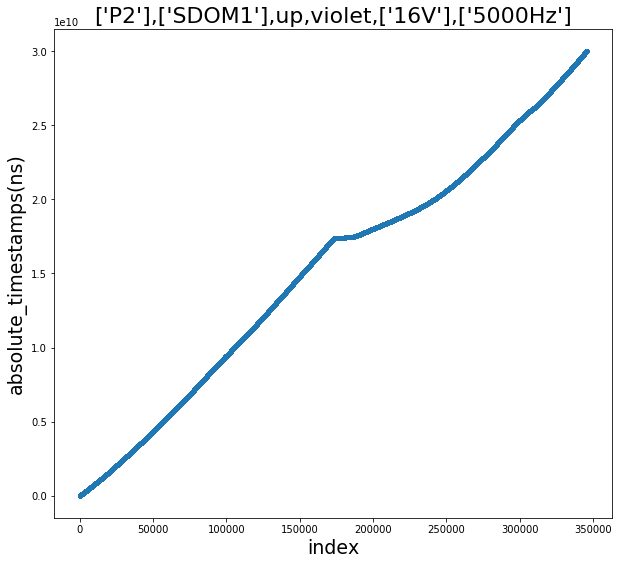

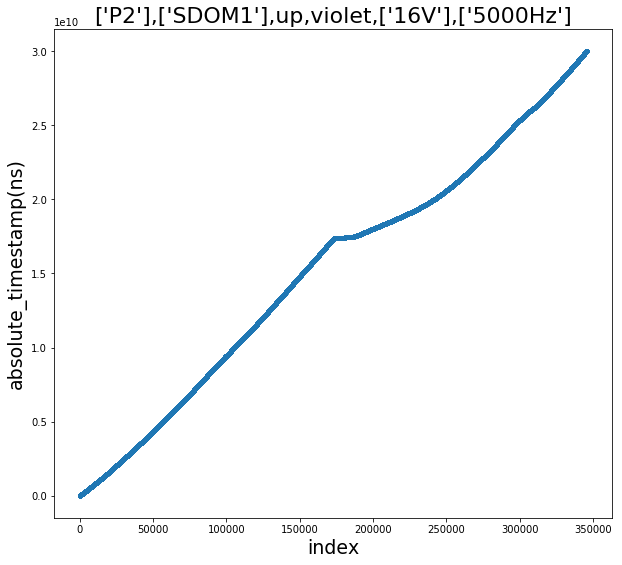

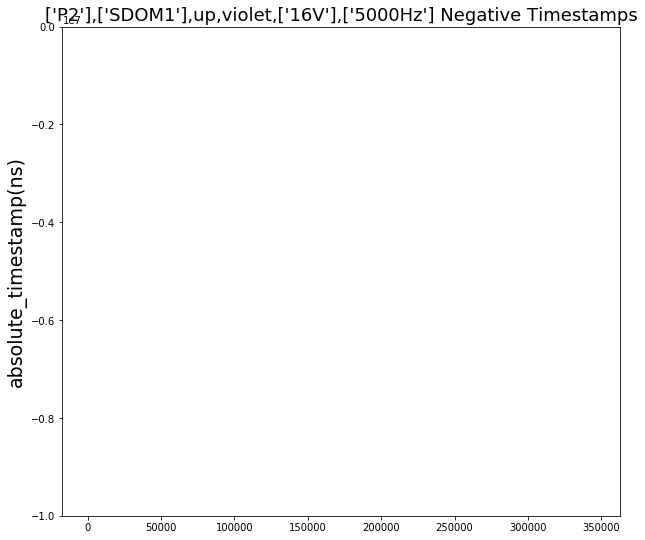

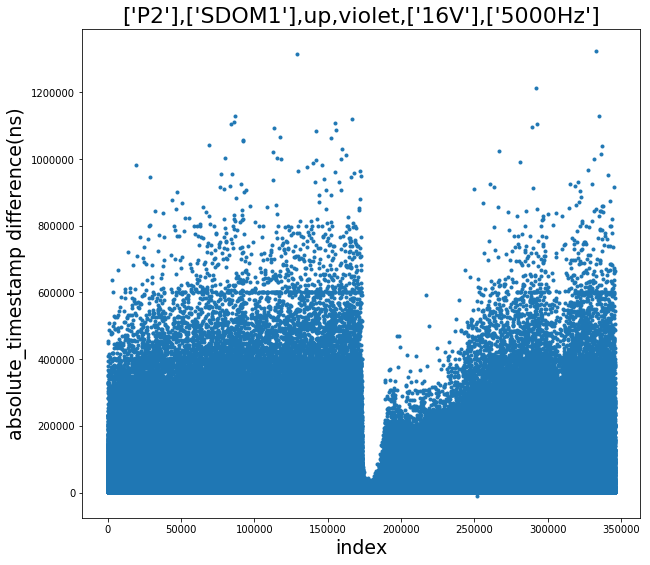

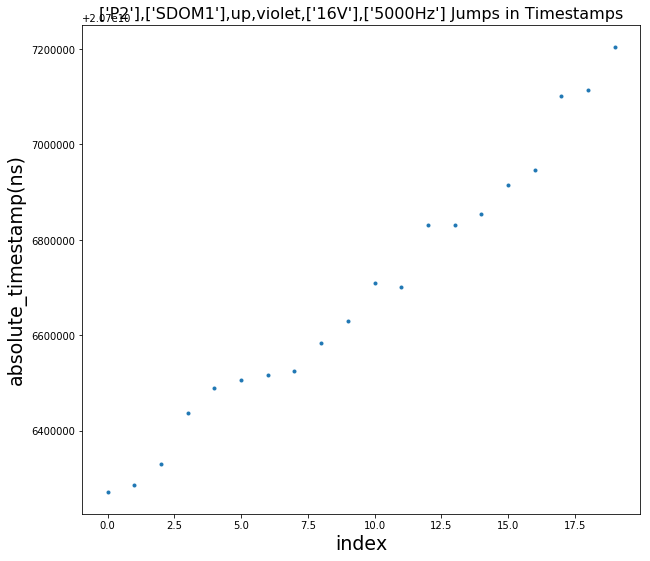

[251556. 251557. 251558. 251559. 251560.]


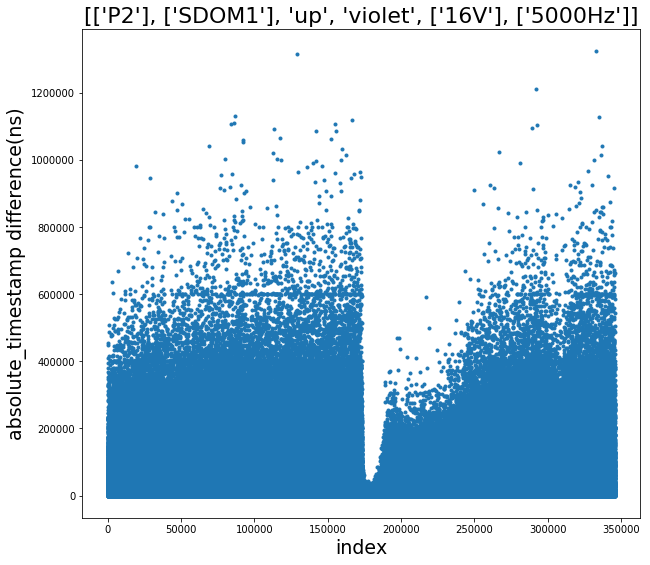

0.8288823062928582


In [15]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT) = b.P_S_used()

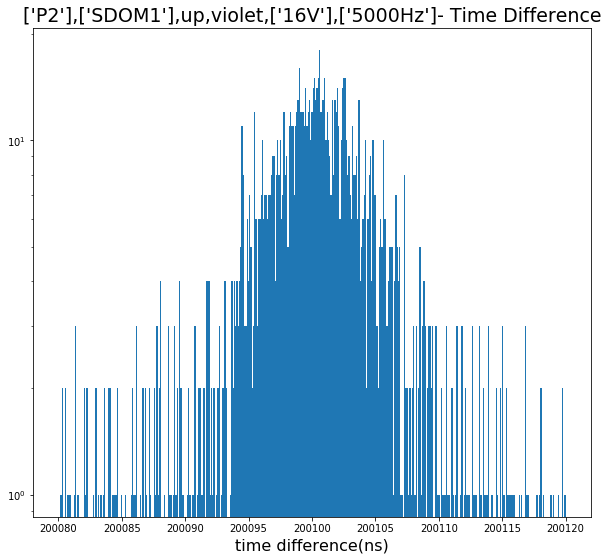

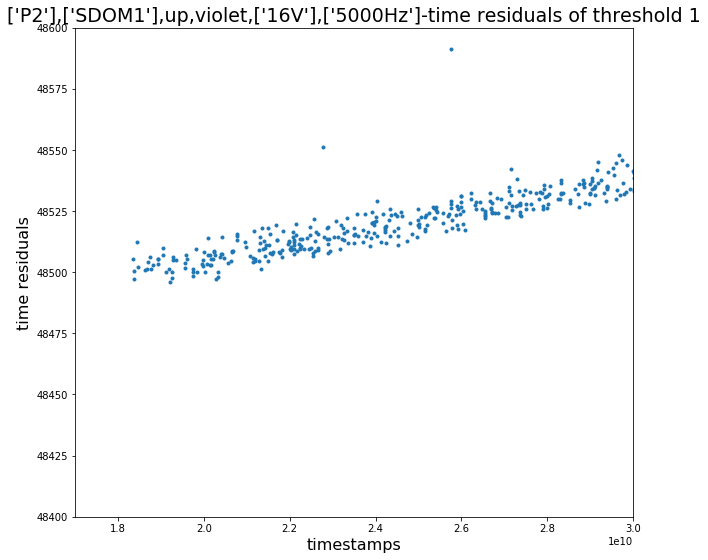

In [16]:
r2 = residual.residual(abs_elim_3,rising_1_elim_3,200080, 200120, 400, 
                                200095, 200105,
             1.7e10,3.0e10,48400, 48600, file_path, values, POCAM_num)

In [17]:
gaus_peak = r2.minimizer(2.2e10, 3.0e10)

200100.33066016817


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

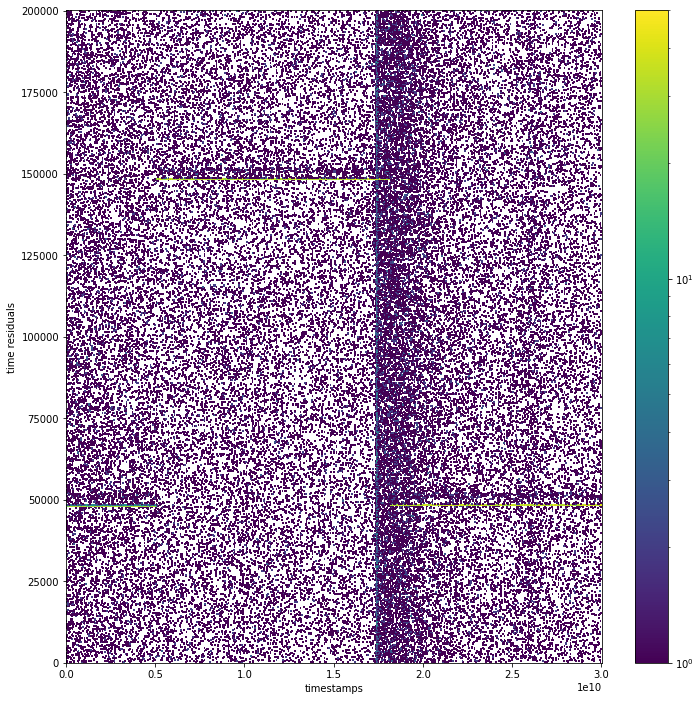

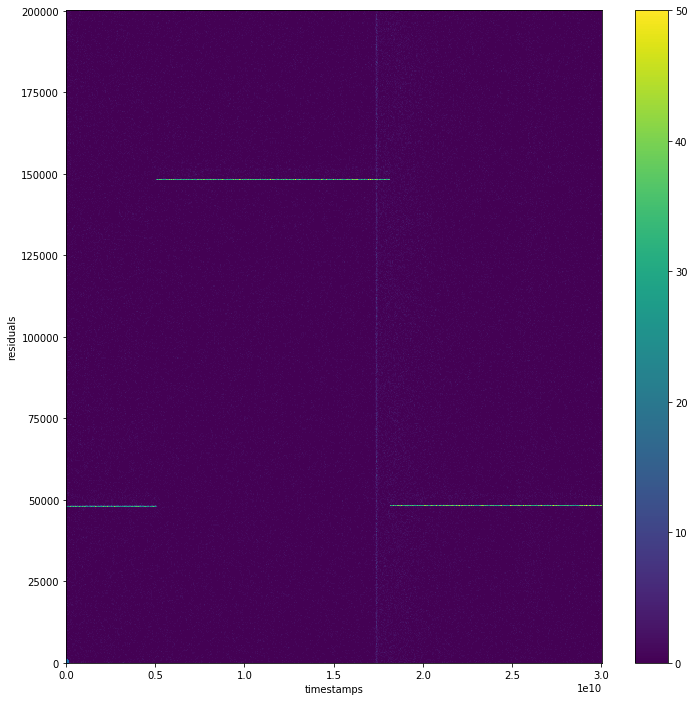

In [19]:
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r2.HIST2D(625, gaus_peak, SDOM_num)

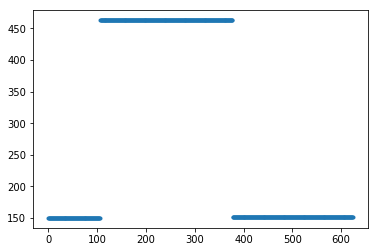

In [20]:
plt.plot(POCAM_bins, '.')

run# 0
b 1 Max 1
select size 183
median -  48326.72221520147
a 1 1 min
run# 1
b 2 Max 2
select size 190
median -  48327.098944434605
a 2 2 min
run# 2
b 3 Max 3
select size 188
median -  48326.623303728324
a 3 3 min
run# 3
b 4 Max 4
select size 165
median -  48330.1654626823
a 4 4 min
run# 4
b 5 Max 5
select size 172
median -  48327.524773982674
a 5 5 min
run# 5
b 6 Max 6
select size 177
median -  48326.210163237396
a 6 6 min
run# 6
b 7 Max 7
select size 159
median -  48328.469338560884
a 7 7 min
run# 7
b 8 Max 8
select size 139
median -  48325.73945001008
a 8 8 min
run# 8
b 9 Max 9
select size 179
median -  48327.926099378295
a 9 9 min
run# 9
b 10 Max 10
select size 161
median -  48328.37184184461
a 10 10 min
run# 10
b 11 Max 11
select size 123
median -  48327.81047069382
a 11 11 min
run# 11
b 12 Max 12
select size 184
median -  48326.42775981473
a 12 12 min
run# 12
b 13 Max 13
select size 177
median -  48327.08732865748
a 13 13 min
run# 13
b 14 Max 14
select size 154
median -  48329.8

/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:728: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


a 19 19 min
run# 19
b 20 Max 20
select size 156
median -  48327.784057068464
a 20 20 min
run# 20
b 21 Max 21
select size 159
median -  48328.669887891956
a 21 21 min
run# 21
b 22 Max 22
select size 151
median -  48328.230530297646
a 22 22 min
run# 22
b 23 Max 23
select size 169
median -  48328.88832249255
a 23 23 min
run# 23
b 24 Max 24
select size 152
median -  48330.03469057477
a 24 24 min
run# 24
b 25 Max 25
select size 143
median -  48328.132481854846
a 25 25 min
run# 25
b 26 Max 26
select size 155
median -  48327.414109327394
a 26 26 min
run# 26
b 27 Max 27
select size 151
median -  48326.94979858477
a 27 27 min
run# 27
b 28 Max 28
select size 132
median -  48327.392114518065
a 28 28 min
run# 28
b 29 Max 29
select size 154
median -  48328.47733206522
a 29 29 min
run# 29
b 30 Max 30
select size 152
median -  48326.6952580971
a 30 30 min
run# 30
b 31 Max 31
select size 170
median -  48327.55705375345
a 31 31 min
run# 31
b 32 Max 32
select size 150
median -  48329.054791255956
a 32 3

a 133 133 min
run# 132
b 134 Max 134
select size 138
median -  148435.43799990806
a 134 134 min
run# 133
b 135 Max 135
select size 121
median -  148433.6516506678
a 135 135 min
run# 134
b 136 Max 136
select size 152
median -  148436.39640665206
a 136 136 min
run# 135
b 137 Max 137
select size 127
median -  148436.05372612245
a 137 137 min
run# 136
b 138 Max 138
select size 102
median -  148434.02606327704
a 138 138 min
run# 137
b 139 Max 139
select size 105
median -  148433.4036661594
a 139 139 min
run# 138
b 140 Max 140
select size 126
median -  148436.45853387183
a 140 140 min
run# 139
b 141 Max 141
select size 129
median -  148433.37283509882
a 141 141 min
run# 140
b 142 Max 142
select size 144
median -  148434.3611834866
a 142 142 min
run# 141
b 143 Max 143
select size 99
median -  148433.54630476766
a 143 143 min
run# 142
b 144 Max 144
select size 134
median -  148435.57824462117
a 144 144 min
run# 143
b 145 Max 145
select size 108
median -  148435.28134526245
a 145 145 min
run# 1

a 238 238 min
run# 237
b 239 Max 239
select size 121
median -  148435.47736678703
a 239 239 min
run# 238
b 240 Max 240
select size 132
median -  148438.12888275422
a 240 240 min
run# 239
b 241 Max 241
select size 102
median -  148436.92719273554
a 241 241 min
run# 240
b 242 Max 242
select size 130
median -  148437.8488463355
a 242 242 min
run# 241
b 243 Max 243
select size 120
median -  148437.13802544717
a 243 243 min
run# 242
b 244 Max 244
select size 122
median -  148437.55115410432
a 244 244 min
run# 243
b 245 Max 245
select size 110
median -  148438.27115400543
a 245 245 min
run# 244
b 246 Max 246
select size 126
median -  148437.9302489123
a 246 246 min
run# 245
b 247 Max 247
select size 116
median -  148438.46815726103
a 247 247 min
run# 246
b 248 Max 248
select size 112
median -  148438.09628609638
a 248 248 min
run# 247
b 249 Max 249
select size 130
median -  148438.7880829323
a 249 249 min
run# 248
b 250 Max 250
select size 99
median -  148437.95094756933
a 250 250 min
run# 2

a 339 339 min
run# 338
b 340 Max 340
select size 126
median -  148440.16605465967
a 340 340 min
run# 339
b 341 Max 341
select size 137
median -  148441.23351237908
a 341 341 min
run# 340
b 342 Max 342
select size 105
median -  148439.9960040741
a 342 342 min
run# 341
b 343 Max 343
select size 96
median -  148441.44064784306
a 343 343 min
run# 342
b 344 Max 344
select size 99
median -  148438.3201447997
a 344 344 min
run# 343
b 345 Max 345
select size 93
median -  148440.2897628778
a 345 345 min
run# 344
b 346 Max 346
select size 131
median -  148440.3638167354
a 346 346 min
run# 345
b 347 Max 347
select size 125
median -  148439.58166146427
a 347 347 min
run# 346
b 348 Max 348
select size 115
median -  148443.32526026107
a 348 348 min
run# 347
b 349 Max 349
select size 112
median -  148438.2545851915
a 349 349 min
run# 348
b 350 Max 350
select size 96
median -  148439.45619388804
a 350 350 min
run# 349
b 351 Max 351
select size 122
median -  148441.07524011537
a 351 351 min
run# 350
b 

a 441 441 min
run# 439
b 442 Max 442
select size 154
median -  48439.00810463962
a 442 442 min
run# 440
b 443 Max 443
select size 144
median -  48441.318428515486
a 443 443 min
run# 441
b 444 Max 444
select size 158
median -  48440.72941781457
a 444 444 min
run# 442
b 445 Max 445
select size 150
median -  48440.496080951794
a 445 445 min
run# 443
b 446 Max 446
select size 140
median -  48439.57381163162
a 446 446 min
run# 444
b 447 Max 447
select size 140
median -  48440.90489719651
a 447 447 min
run# 445
b 448 Max 448
select size 146
median -  48439.272496979305
a 448 448 min
run# 446
b 449 Max 449
select size 148
median -  48441.02704261508
a 449 449 min
run# 447
b 450 Max 450
select size 154
median -  48438.73899836323
a 450 450 min
run# 448
b 451 Max 451
select size 156
median -  48443.03829591448
a 451 451 min
run# 449
b 452 Max 452
select size 146
median -  48440.93264703252
a 452 452 min
run# 450
b 453 Max 453
select size 141
median -  48438.493016537
a 453 453 min
run# 451
b 45

a 543 543 min
run# 541
b 544 Max 544
select size 158
median -  48441.045670082036
a 544 544 min
run# 542
b 545 Max 545
select size 160
median -  48439.68340306633
a 545 545 min
run# 543
b 546 Max 546
select size 148
median -  48441.09693884925
a 546 546 min
run# 544
b 547 Max 547
select size 162
median -  48440.08487011693
a 547 547 min
run# 545
b 548 Max 548
select size 150
median -  48438.58335128956
a 548 548 min
run# 546
b 549 Max 549
select size 140
median -  48438.78330910839
a 549 549 min
run# 547
b 550 Max 550
select size 146
median -  48440.180308891504
a 550 550 min
run# 548
b 551 Max 551
select size 162
median -  48439.21091391874
a 551 551 min
run# 549
b 552 Max 552
select size 134
median -  48440.02260159387
a 552 552 min
run# 550
b 553 Max 553
select size 136
median -  48438.676856109174
a 553 553 min
run# 551
b 554 Max 554
select size 138
median -  48439.505816483026
a 554 554 min
run# 552
b 555 Max 555
select size 142
median -  48439.76086579368
a 555 555 min
run# 553
b

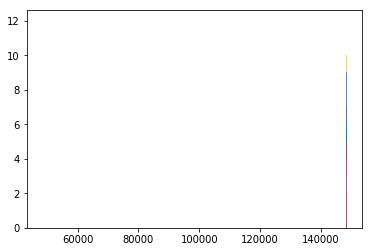

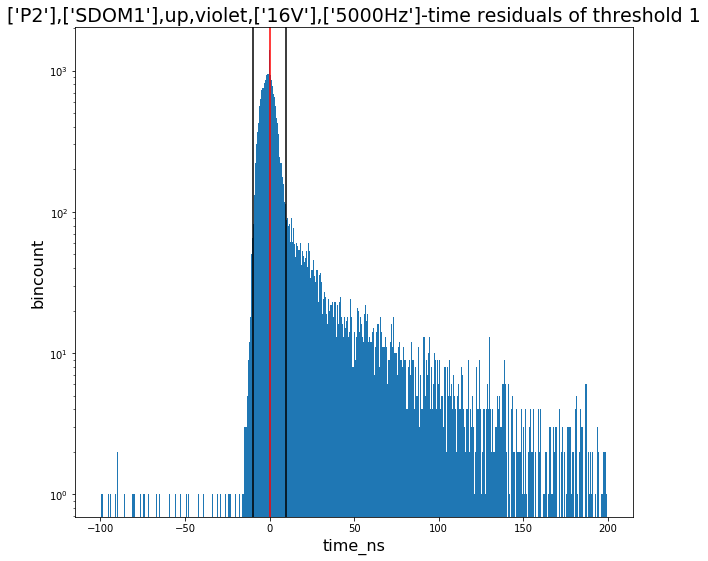

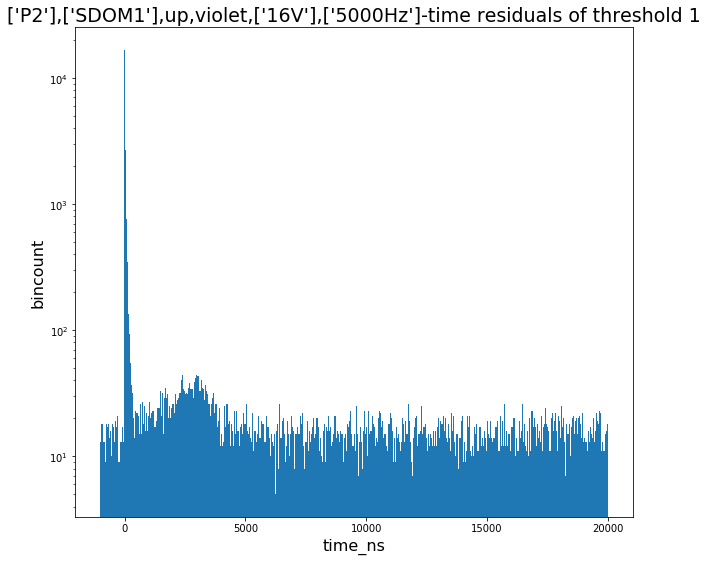

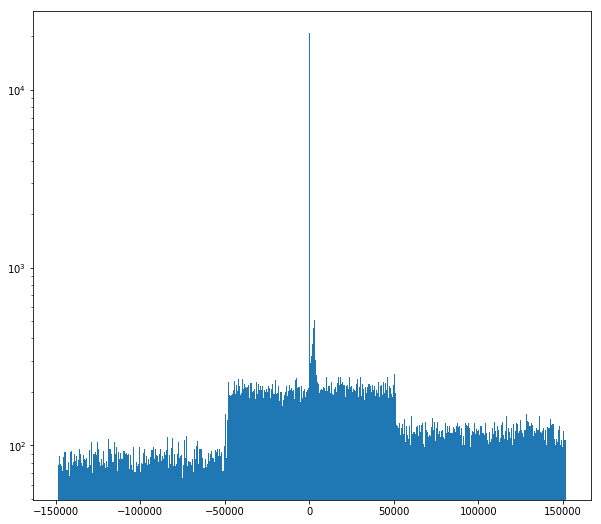

In [21]:
t_res_all2,  num_events2, noise_events2 = r2.calc_res(BinsHist,10, 2, 1)

In [22]:
v2 = run.run()

In [23]:
RunTime2, error_rtime2 = v2.run_time(atstamp, p_jumps, dt_mean)

0
0
0 251556 20706506991.84375 p
4 251560 20706701091.55469 q
time removed(small jumps) -  194099.7109413147
timestamp of the last event -  30028944499.226562
eliminating high jumps and summing -  30020487407.496094
run time -  30020293307.785152


In [24]:
distance2, angle_cr2 = v2.angl_dist(POCAM_num, SDOM_num, PMT)

In [25]:
eve_p_sec2, error_nevents2, n_eve_p_sec2 = v2.correction(num_events2, noise_events2)

In [26]:
eve_p_sec2

573.2884782101639

In [27]:
c = clean.clean('20181205_092552_UTC_SDOM2_FLASH_SANTACLAUS_P2_violet_both_5000Hz_16V_60s_18339132719.hld_up.hdf5')

percentage of high jumps in the file - 1.8430364340228378


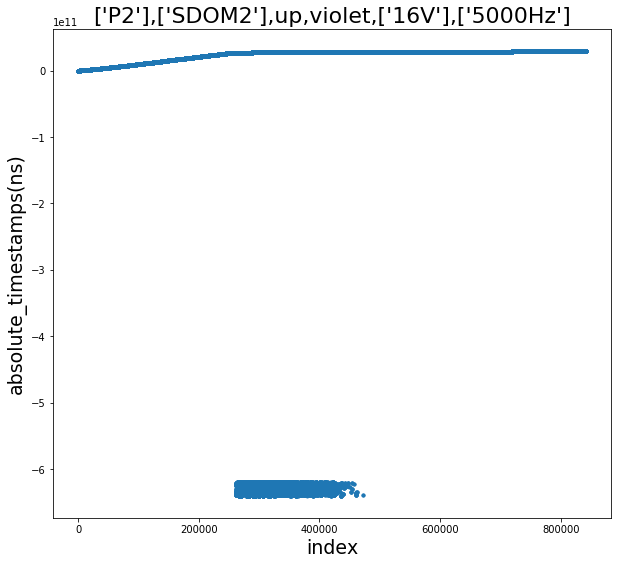

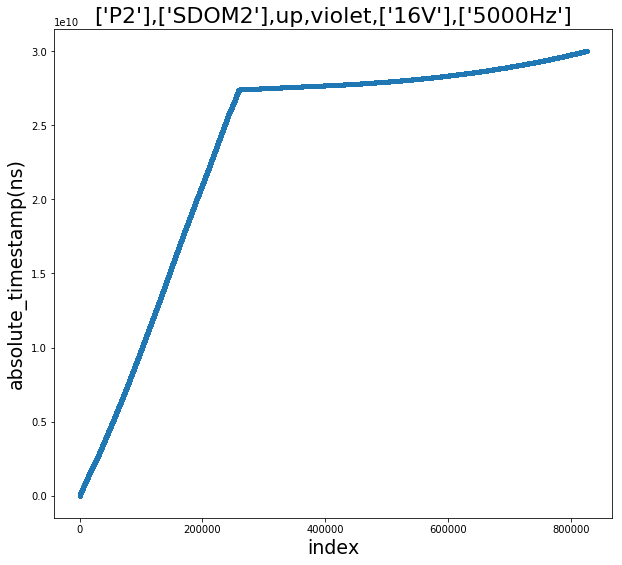

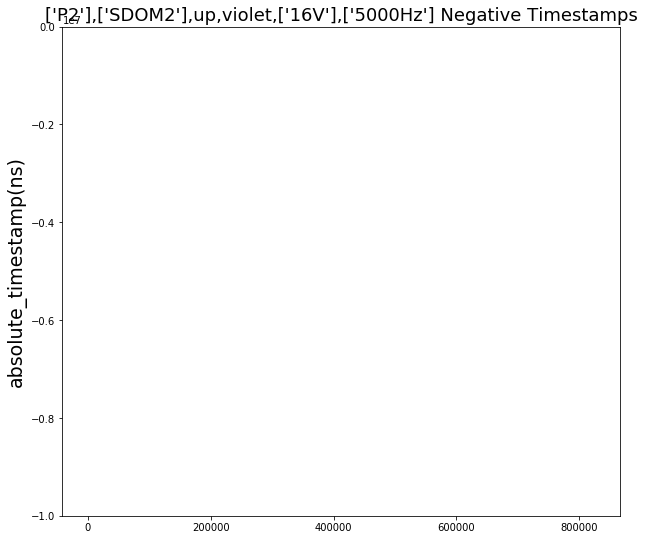

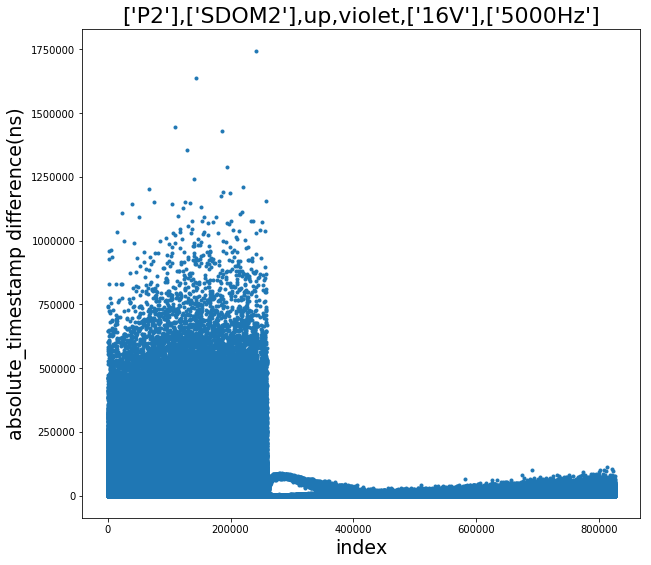

[]


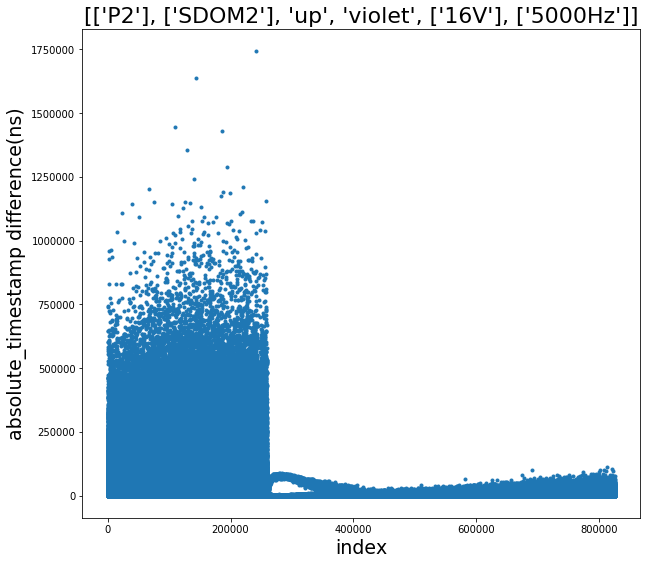

0.6291277752053226


In [28]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT) = c.P_S_used()

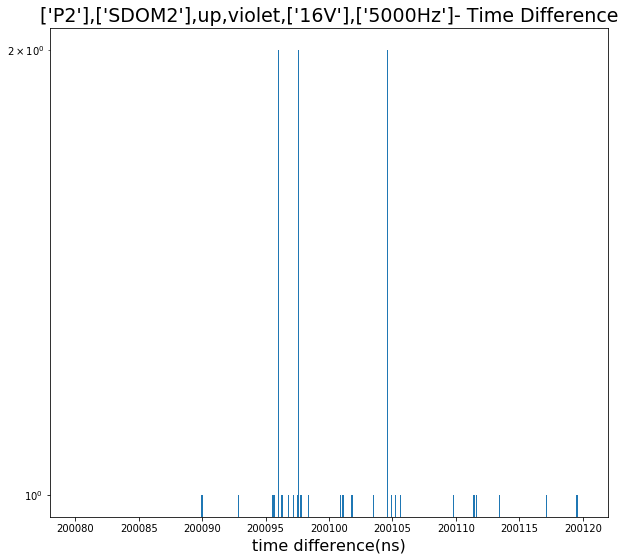

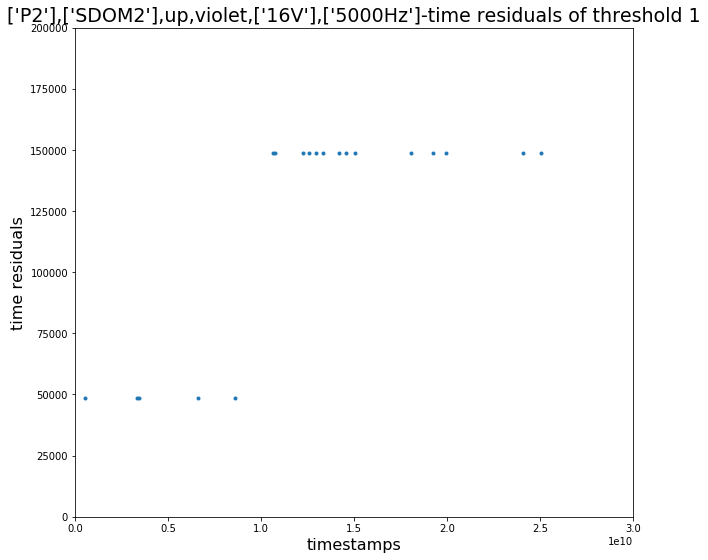

In [29]:
r3 = residual.residual(abs_elim_3, rising_1_elim_3,200080, 200120, 400, 
                                200095, 200105,
             0.0e10,3.0e10,0, 200000, file_path, values, POCAM_num)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 139 144 147]


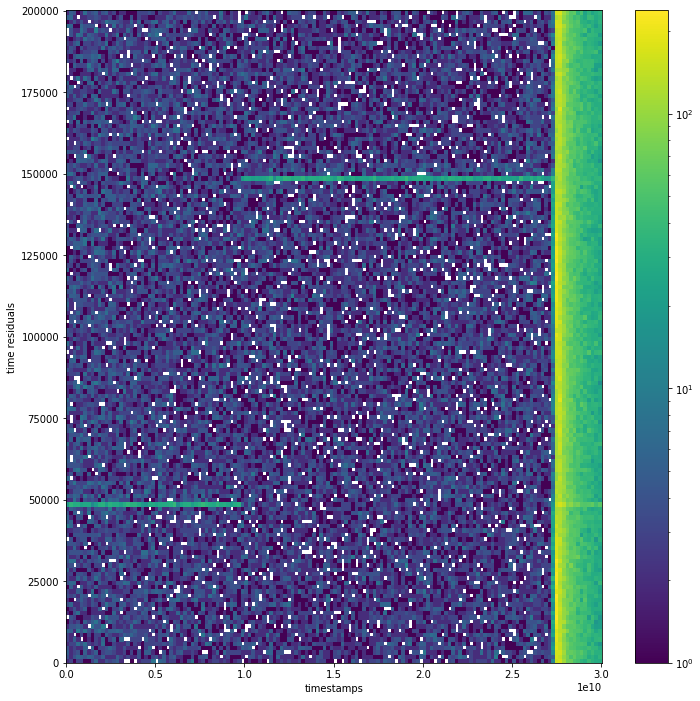

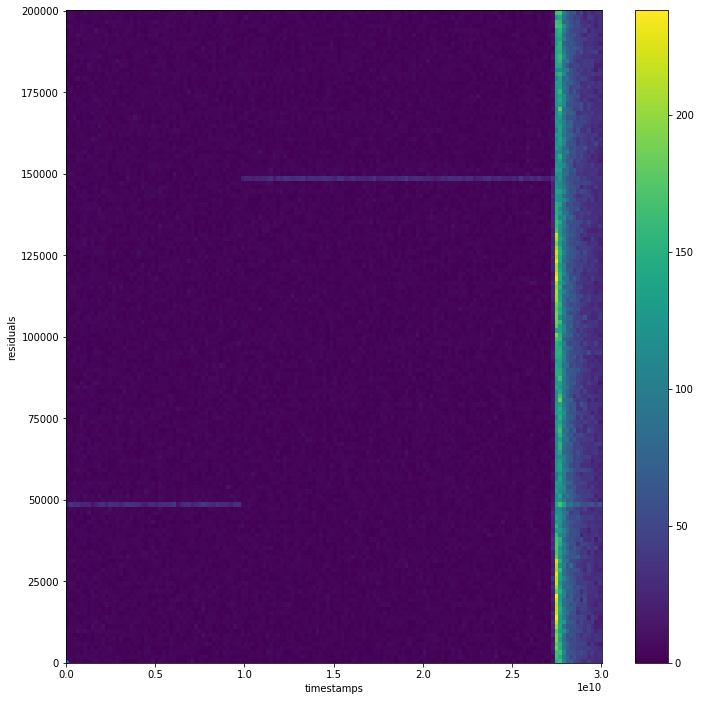

In [30]:
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r3.HIST2D(150, gaus_peak, SDOM_num)

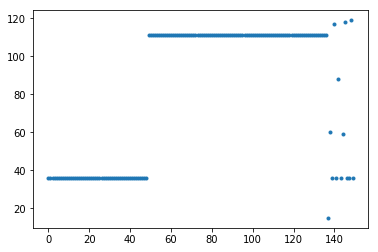

In [31]:
plt.plot(POCAM_bins, '.')

run# 0
b 1 Max 1
select size 449
median -  48514.97616114805
a 1 1 min
run# 1
b 2 Max 2
select size 450
median -  48515.05861350233
a 2 2 min
run# 2
b 3 Max 3
select size 474
median -  48518.041121653194
a 3 3 min
run# 3
b 4 Max 4
select size 484
median -  48513.23336451035
a 4 4 min
run# 4
b 5 Max 5
select size 506
median -  48513.792548054786
a 5 5 min
run# 5
b 6 Max 6
select size 516
median -  48516.90879650756
a 6 6 min
run# 6
b 7 Max 7
select size 429
median -  48514.23645363422
a 7 7 min
run# 7
b 8 Max 8
select size 532
median -  48515.32368941864
a 8 8 min
run# 8
b 9 Max 9
select size 526
median -  48514.808119301015
a 9 9 min
run# 9
b 10 Max 10
select size 547
median -  48518.11664710683
a 10 10 min
run# 10
b 11 Max 11
select size 500
median -  48516.981863544235
a 11 11 min
run# 11
b 12 Max 12
select size 492
median -  48514.52701168918
a 12 12 min
run# 12
b 13 Max 13
select size 447
median -  48521.84062932359
a 13 13 min
run# 13
b 14 Max 14
select size 480
median -  48517.98

a 117 117 min
run# 116
b 118 Max 118
select size 373
median -  148729.67453570623
a 118 118 min
run# 117
b 119 Max 119
select size 376
median -  148724.99301247043
a 119 119 min
run# 118
b 120 Max 120
select size 409
median -  148730.75884673337
a 120 120 min
run# 119
b 121 Max 121
select size 394
median -  148725.95242172905
a 121 121 min
run# 120
b 122 Max 122
select size 392
median -  148732.6227382652
a 122 122 min
run# 121
b 123 Max 123
select size 410
median -  148725.0281195553
a 123 123 min
run# 122
b 124 Max 124
select size 391
median -  148725.37891264923
a 124 124 min
run# 123
b 125 Max 125
select size 365
median -  148727.76218202082
a 125 125 min
run# 124
b 126 Max 126
select size 378
median -  148726.02585047943
a 126 126 min
run# 125
b 127 Max 127
select size 389
median -  148731.70351390407
a 127 127 min
run# 126
b 128 Max 128
select size 342
median -  148730.16048767755
a 128 128 min
run# 127
b 129 Max 129
select size 385
median -  148727.07845889416
a 129 129 min
run#

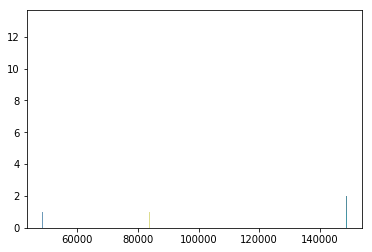

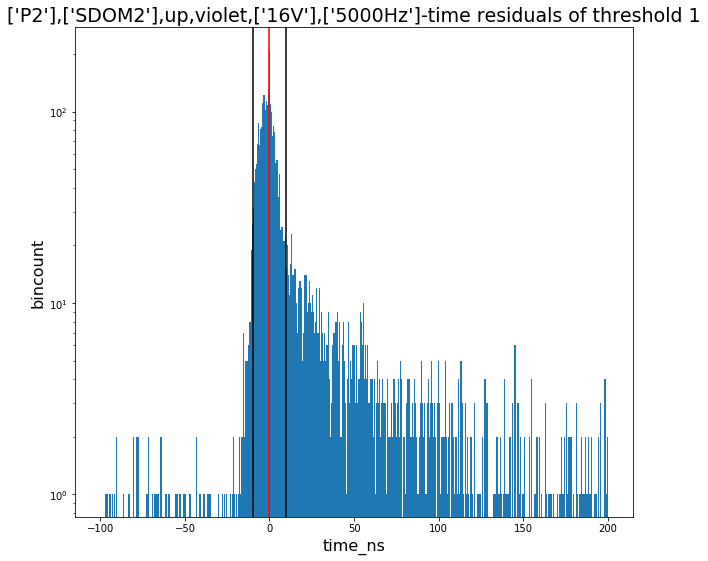

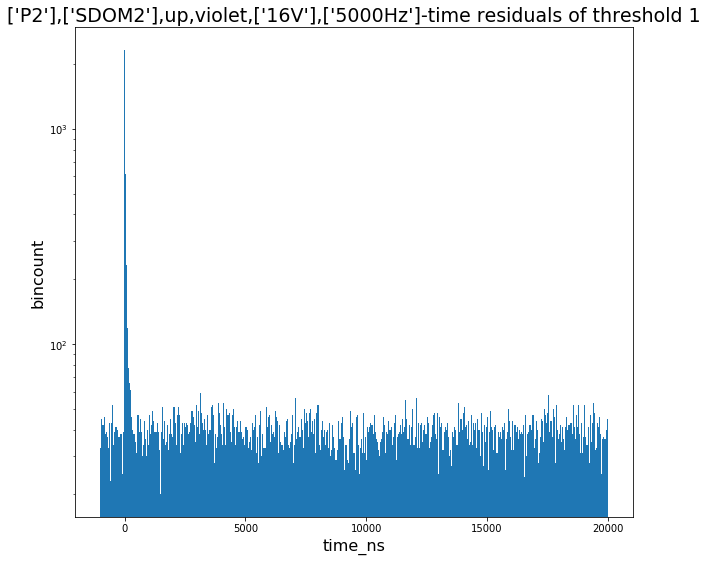

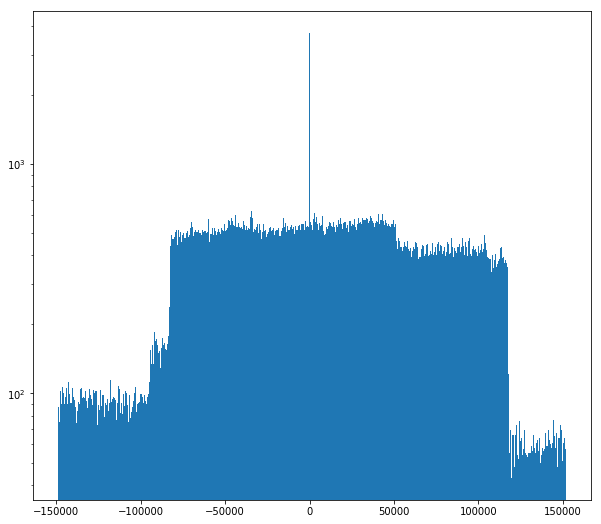

In [32]:
t_res_all3, num_events3, noise_events3 = r3.calc_res(BinsHist, 15, 2, 2)

In [33]:
v3 = run.run()

In [34]:
RunTime3, error_rtime3 = v3.run_time(atstamp, p_jumps, dt_mean)

260884

260940 260891
261096 260943
261194 261101
261249 261196
261304 261251
261414 261306
261470 261421
261525 261474
261579 261531
261691 261582
261746 261697
261858 261749
261914 261860
261971 261917
262082 261976
262138 262088
262194 262145
262250 262202
262414 262262
262470 262419
262525 262475
262582 262529
262694 262589
262750 262696
262806 262758
262860 262808
262916 262866
262972 262919
263026 262975
263082 263037
263140 263088
263196 263147
263252 263200
263308 263262
263365 263318
263422 263369
263480 263428
263537 263490
263593 263545
263649 263602
263706 263654
263761 263716
263818 263770
263875 263825
263931 263881
263987 263939
264045 263998
264103 264049
264160 264111
264218 264169
264276 264220
264334 264282
264389 264344
264446 264399
264504 264454
264561 264506
264618 264568
264676 264631
264734 264685
264791 264744
264848 264799
264906 264850
264961 264911
265018 264975
265074 265021
265131 265094
265188 265135
265246 265196
265304 265259
265362 265317
265420 26536

336332 336283
336389 336341
336447 336391
336503 336452
336558 336507
336615 336565
336672 336621
336730 336679
336787 336732
336845 336795
336902 336851
336958 336908
337016 336968
337128 337023
337242 337132
337357 337254
337413 337371
337469 337424
337527 337475
337584 337544
337755 337597
337871 337763
337929 337885
337986 337931
338100 337992
338157 338111
338214 338166
338327 338216
338384 338334
338496 338392
338551 338505
338608 338563
338664 338610
338721 338666
338834 338729
338891 338842
338948 338897
339005 338959
339062 339015
339120 339077
339176 339125
339232 339182
339289 339234
339347 339299
339405 339366
339462 339419
339518 339466
339575 339521
339631 339586
339686 339635
339741 339693
339798 339745
339856 339802
339913 339859
339969 339921
340025 339975
340082 340027
340252 340092
340366 340259
340423 340371
340592 340435
340646 340596
340703 340653
340815 340709
340873 340826
340929 340877
340985 340933
341042 340993
341099 341047
341155 341101
341209 341157
341265

416628 416578
416948 416631
417102 416952
417408 417105
417653 417417
417812 417657
418068 417815
418122 418075
418231 418132
418336 418236
418445 418344
418653 418447
418756 418655
418812 418761
418924 418819
418980 418926
419034 418986
419090 419037
419144 419092
419245 419149
419700 419251
419754 419704
419810 419760
419865 419815
420303 419872
420464 420310
420520 420467
420683 420528
420739 420685
421474 420749
421531 421480
421587 421542
422085 421594
422275 422091
422599 422280
422756 422609
422813 422761
423164 422815
423968 423166
424122 423980
425834 424128
426085 425839
426186 426090
426350 426191
426454 426357
426561 426463
426853 426564
426996 426856
427148 426998
427648 427155
427751 427651
427966 427754
428069 427971
428351 428077
428684 428359
428876 428687
429090 428879
431231 429105
431447 431237
431804 431452
432222 431809
432539 432225
432594 432542
433059 432601
433346 433070
434786 433348
435101 434791
435427 435106
437085 435437
437140 437089
437196 437142
437885

timestamp of the last event -  30030095936.60596
eliminating high jumps and summing -  29901404503.5427
run time -  29901404503.5427


In [35]:
distance3, angle_cr3 = v3.angl_dist(POCAM_num, SDOM_num, PMT)

In [36]:
eve_p_sec3, error_nevents3, n_eve_p_sec3 = v3.correction(num_events3, noise_events3)

In [37]:
eve_p_sec3

76.93245788291243

In [38]:
d = clean.clean('20181205_092552_UTC_SDOM3_FLASH_SANTACLAUS_P2_violet_both_5000Hz_16V_60s_18339132719.hld_up.hdf5')

percentage of high jumps in the file - 0.0


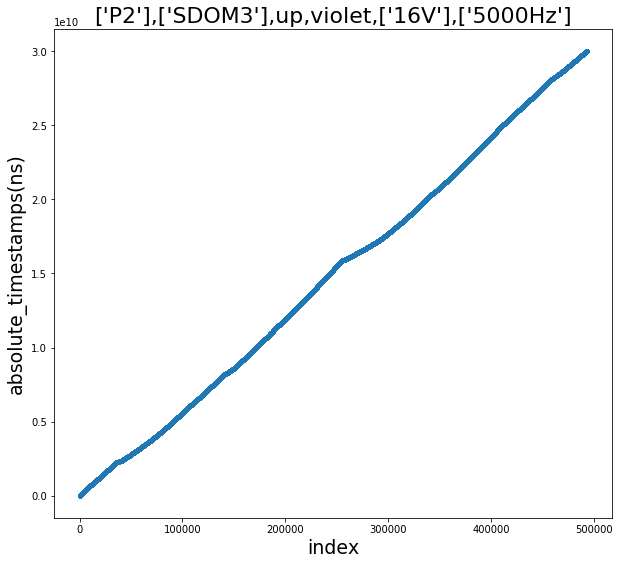

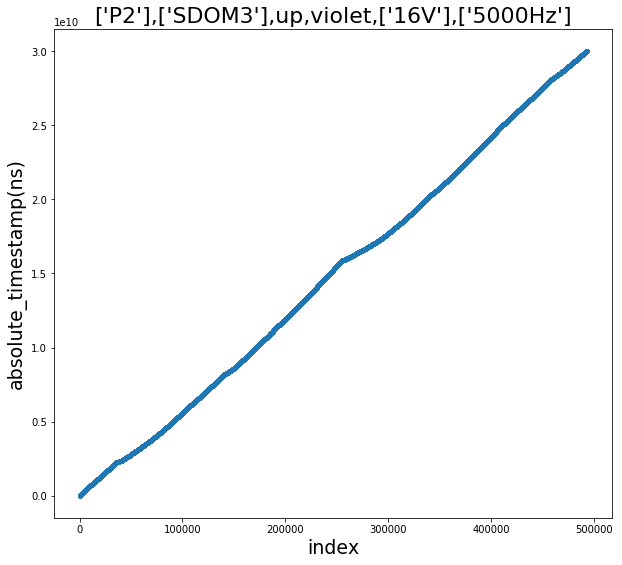

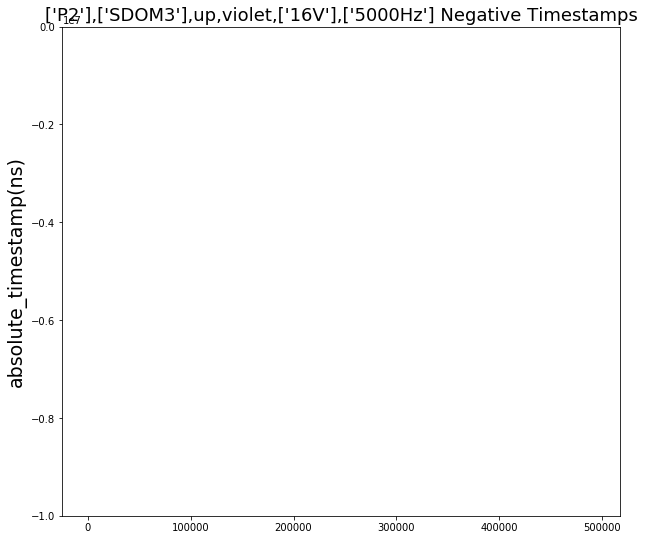

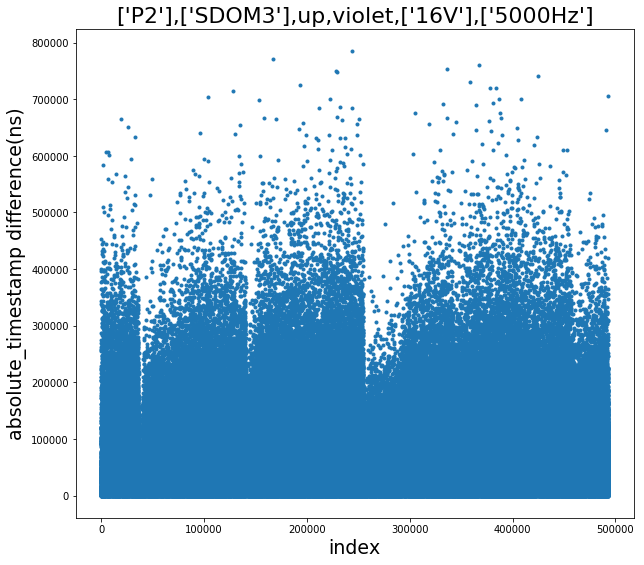

[]


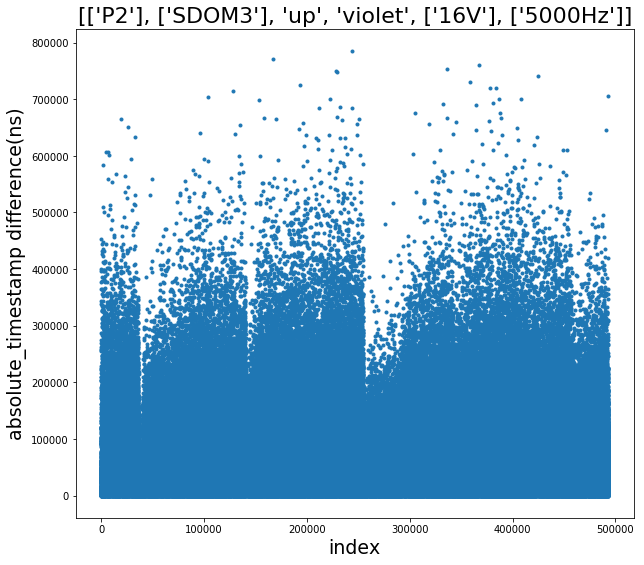

0.6594039037690719


In [39]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT) = d.P_S_used()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


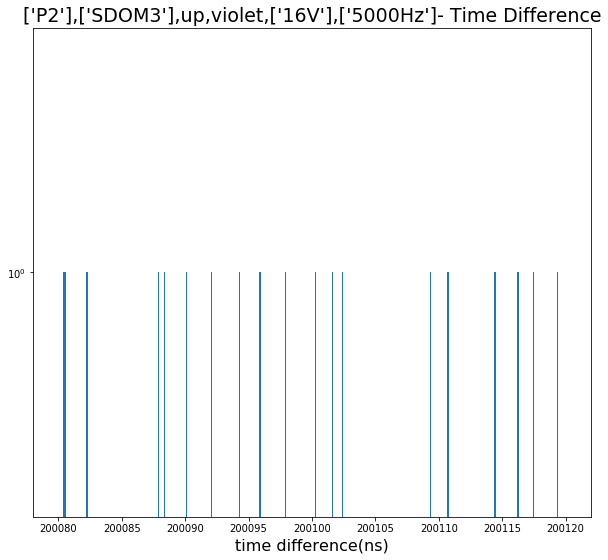

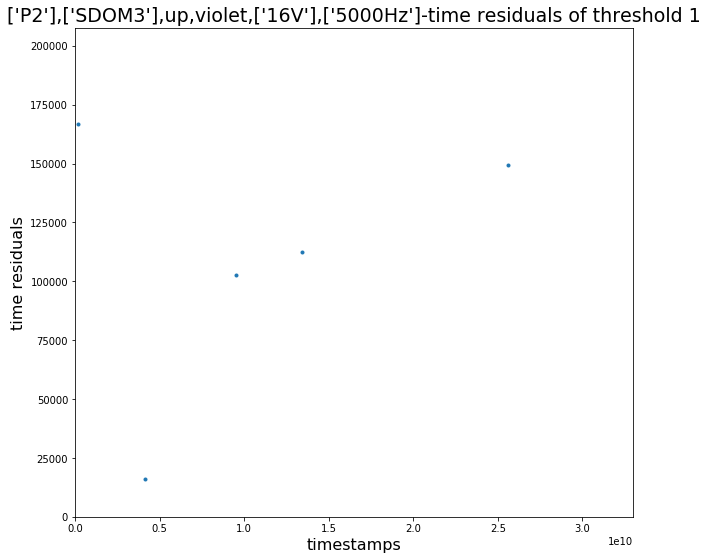

In [40]:
r4 = residual.residual(abs_elim_3, rising_1_elim_3,200080, 200120, 400, 
                                200095, 200105,
             0.0e10,3.3e10,0, 207750, file_path, values, POCAM_num)

[ 1  2  3  4  5  6  7  9 11 12 15 17 18 22 23 24 25 26 27 28 29 30 31 32
 33 34 37 38 40 41 42 43 46 47 50 51 52 53 54 55 57 58 59 60 61 62 64 65
 66 67 68 69]


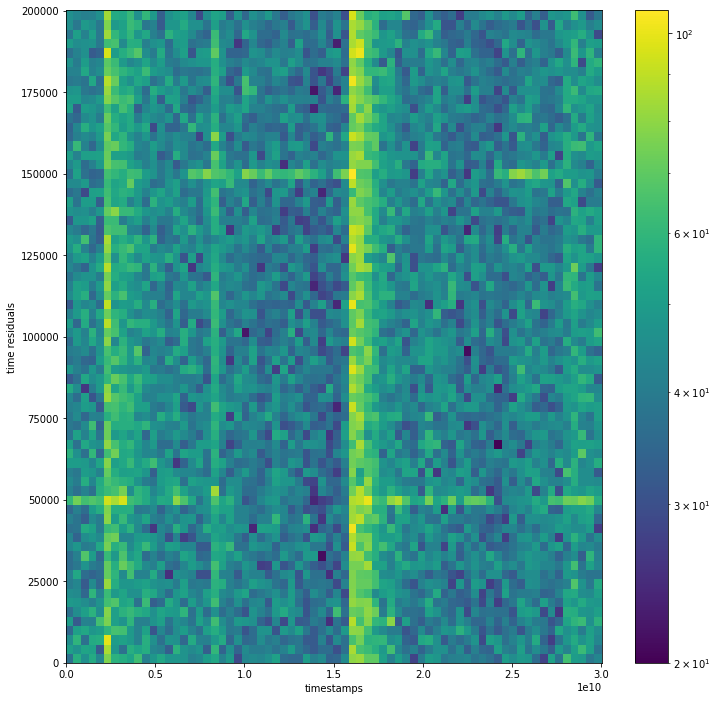

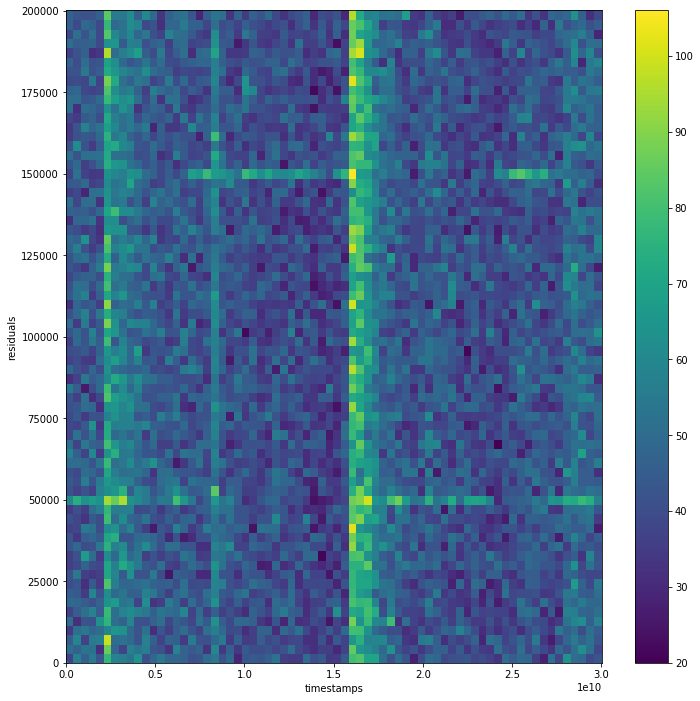

In [41]:
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r4.HIST2D(70, gaus_peak, SDOM_num)

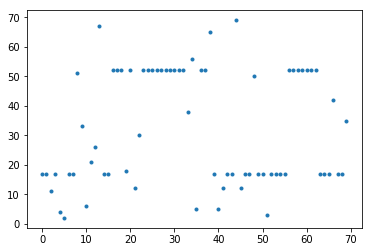

In [42]:
plt.plot(POCAM_bins, '.')

run# 0
b 1 Max 1
select size 2992
median -  48720.41642601375
a 1 1 min
run# 1
b 2 Max 2
select size 3115
median -  48728.24095916591
a 2 2 min
run# 2
b 3 Max 3
select size 3177
median -  31880.172237552993
a 3 3 min
run# 3
b 4 Max 4
select size 3168
median -  48712.09377620838
a 4 4 min
run# 4
b 5 Max 5
select size 3074
median -  11950.803706652645
a 5 5 min
run# 5
b 6 Max 6
select size 5134
median -  5966.362150533445
a 6 6 min
run# 6
b 7 Max 7
select size 4112
median -  48719.426038938545
a 7 7 min
run# 7
b 9 Max 9
select size 7708
median -  97137.93578513146
a 9 9 min
run# 8
b 11 Max 11
select size 6779
median -  54009.169110158866
a 11 11 min
run# 9
b 12 Max 12
select size 3149
median -  60684.70733924444
a 12 12 min
run# 10
b 15 Max 15
select size 9275
median -  102771.8870965348
a 15 15 min
run# 11
b 17 Max 17
select size 6140
median -  97352.85428253692
a 17 17 min
run# 12
b 18 Max 18
select size 2922
median -  148922.00574586124
a 18 18 min
run# 13
b 22 Max 22
select size 1315

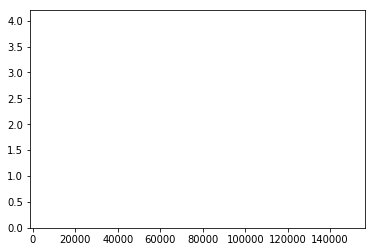

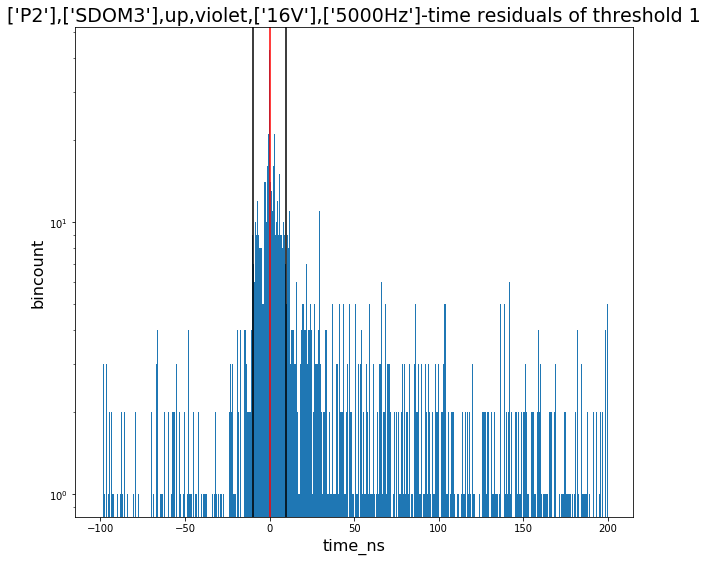

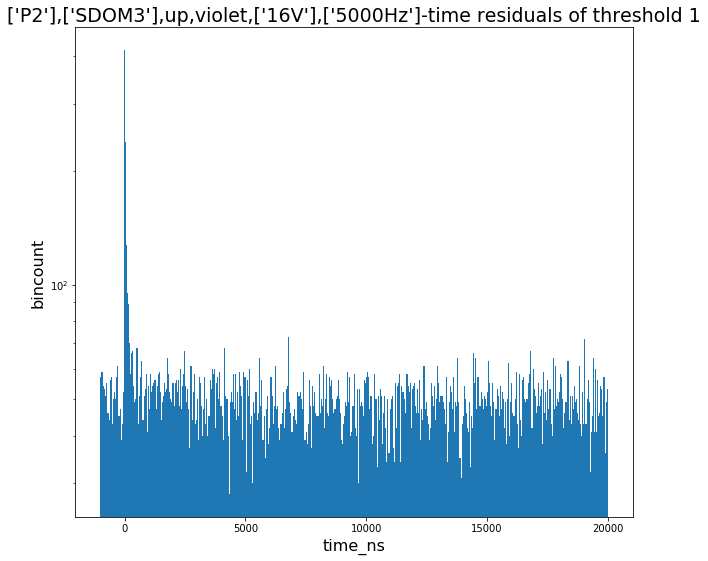

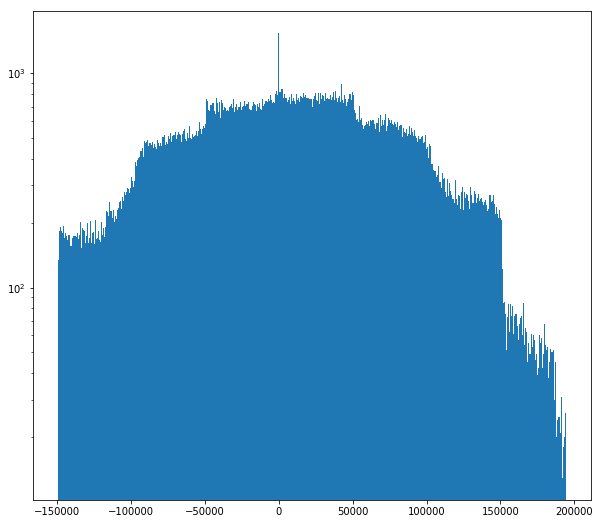

In [43]:
t_res_all1,num_events4, noise_events4 = r4.calc_res(BinsHist, 5, 1, 1)

In [44]:
v4 = run.run()

In [45]:
RunTime4, error_rtime4 = v4.run_time(atstamp, p_jumps, dt_mean)

timestamp of the last event -  30028868592.48047
eliminating high jumps and summing -  30021671485.06738
run time -  30021671485.06738


In [46]:
distance4, angle_cr4 = v4.angl_dist(POCAM_num, SDOM_num, PMT)

In [47]:
eve_p_sec4, error_nevents4, n_eve_p_sec4 = v4.correction(num_events4, noise_events4)

In [48]:
eve_p_sec4

12.585932704580221

In [49]:
eve_p_sec = np.array([#eve_p_sec1, 
                      eve_p_sec2, eve_p_sec3, eve_p_sec4])
distance = np.array([#distance1, 
                     distance2, distance3, distance4])

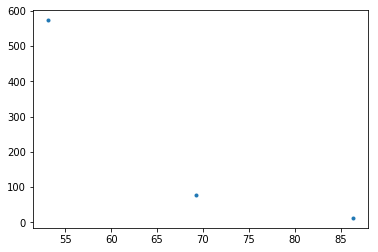

In [50]:
plt.plot(distance, eve_p_sec, '.')

In [52]:
sigg = np.array([#eve_p_sec[0] * (np.sqrt((1/error_nevents1) + (error_rtime1/RunTime1)**2)), 
                eve_p_sec[0] *(np.sqrt((1/(error_nevents2)) + (error_rtime2/RunTime2)**2)),
                eve_p_sec[1] *((np.sqrt(1/(error_nevents3)) + (error_rtime3/RunTime3)**2)),
                eve_p_sec[2] *((np.sqrt(1/(error_nevents4)) + (error_rtime4/RunTime4)**2))])

In [53]:
def chi(N):
    chisq = np.sum(((eve_p_sec - ((N[0]/(distance**2))*np.exp(-distance/N[1])))/sigg)**2)
    return chisq

In [54]:
x0 = [10, 20]
par = minimize(chi,x0, method = 'Powell')

In [55]:
par.x[1]

11.160218653554232

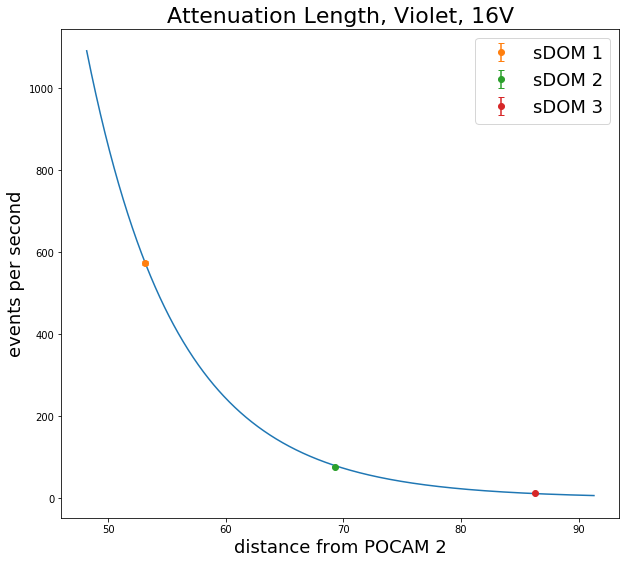

In [58]:
distance_l = np.linspace(distance.min() - 5, distance.max() + 5, 1000)
curve = (par.x[0]/(distance_l**2)) * np.exp(-distance_l/par.x[1])

plt.figure(figsize=(10,9))
plt.plot(distance_l, curve)
#plt.plot(dist_set1, eve_w_angle, '.')
#plt.errorbar(distance[0], eve_p_sec[0], yerr=sigg[0], fmt = 'o', markersize=6, capsize=3, label = 'sDOM 5')
plt.errorbar(distance[0], eve_p_sec[0], yerr=sigg[0], fmt = 'o', markersize=6, capsize=3, label = 'sDOM 1')
plt.errorbar(distance[1], eve_p_sec[1], yerr=sigg[1], fmt = 'o', markersize=6, capsize=3, label = 'sDOM 2')
plt.errorbar(distance[2], eve_p_sec[2], yerr=sigg[2], fmt = 'o', markersize=6, capsize=3, label = 'sDOM 3')
plt.legend(loc = 'best', fontsize = 18)
#plt.ylim(100, 200)
plt.xlabel('distance from POCAM 2', fontsize = 18)
plt.ylabel('events per second', fontsize = 18)
plt.title('Attenuation Length, Violet, 16V', fontsize = 22)   
plt.savefig(file_path + '/graphs/POCAM2, Violet, 16V, 5kHz' + 'attlength.jpeg', dpi = 200)